In [1]:
# Importing the dataset
dataset <- read.csv("D:\\projectR\\datafiles\\creditcard.csv", header = TRUE,
                stringsAsFactors = FALSE,
                strip.white = TRUE ,
                sep = ',')

In [2]:
dataset = dataset[,2:30]

In [3]:
da1 <- lm(Amount~.,data=dataset)
da1


Call:
lm(formula = Amount ~ ., data = dataset)

Coefficients:
(Intercept)           V1           V2           V3           V4           V5  
   88.34962    -29.07777    -80.49135    -34.78666     17.44143    -70.01318  
         V6           V7           V8           V9          V10          V11  
   40.54823     80.32985    -21.58671    -10.07318    -23.31610      0.02548  
        V12          V13          V14          V15          V16          V17  
   -2.38850      1.33027      8.80647     -0.81592     -1.11595      2.15243  
        V18          V19          V20          V21          V22          V23  
   10.63842    -17.25275    110.11657     36.09475    -22.33417    -45.11362  
        V24          V25          V26          V27          V28  
    2.12528    -22.95313     -1.66394     17.86236      7.77315  


In [4]:
summary(da1)


Call:
lm(formula = Amount ~ ., data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-6566.8   -12.4    -6.8     4.8  5205.0 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  88.34962    0.13465  656.123  < 2e-16 ***
V1          -29.07777    0.06875 -422.968  < 2e-16 ***
V2          -80.49135    0.08154 -987.091  < 2e-16 ***
V3          -34.78666    0.08881 -391.710  < 2e-16 ***
V4           17.44143    0.09510  183.394  < 2e-16 ***
V5          -70.01318    0.09756 -717.656  < 2e-16 ***
V6           40.54823    0.10107  401.185  < 2e-16 ***
V7           80.32985    0.10885  738.005  < 2e-16 ***
V8          -21.58671    0.11274 -191.469  < 2e-16 ***
V9          -10.07318    0.12257  -82.186  < 2e-16 ***
V10         -23.31610    0.12367 -188.540  < 2e-16 ***
V11           0.02548    0.13192    0.193    0.847    
V12          -2.38850    0.13476  -17.724  < 2e-16 ***
V13           1.33027    0.13529    9.832  < 2e-16 ***
V14           8.80

In [5]:
data1 <- dataset[c(-11)]

In [16]:
library(caTools)
set.seed(123)
split = sample.split(dataset$Amount, SplitRatio = 0.8)
training = subset(dataset, split == TRUE)
test = subset(dataset, split == FALSE)
summary(training$Amount)
summary(test$Amount)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.99    23.15    96.43    82.50 25691.16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    4.96   18.60   52.92   58.90 4000.00 

In [12]:
da2 <- lm(Amount~V2+V5+V6+V7+V20,data=training)
summary(da2)


Call:
lm(formula = Amount ~ V2 + V5 + V6 + V7 + V20, data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-3682.5   -58.8   -21.1    27.5  7681.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  90.0589     0.2683   335.7   <2e-16 ***
V2          -83.8721     0.1576  -532.3   <2e-16 ***
V5          -71.9277     0.1905  -377.5   <2e-16 ***
V6           41.9484     0.1995   210.3   <2e-16 ***
V7           83.6506     0.2119   394.8   <2e-16 ***
V20         111.8525     0.3317   337.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 129.2 on 231909 degrees of freedom
Multiple R-squared:  0.7742,	Adjusted R-squared:  0.7742 
F-statistic: 1.59e+05 on 5 and 231909 DF,  p-value: < 2.2e-16


Warning message:
"package 'corrplot' was built under R version 3.5.2"corrplot 0.84 loaded


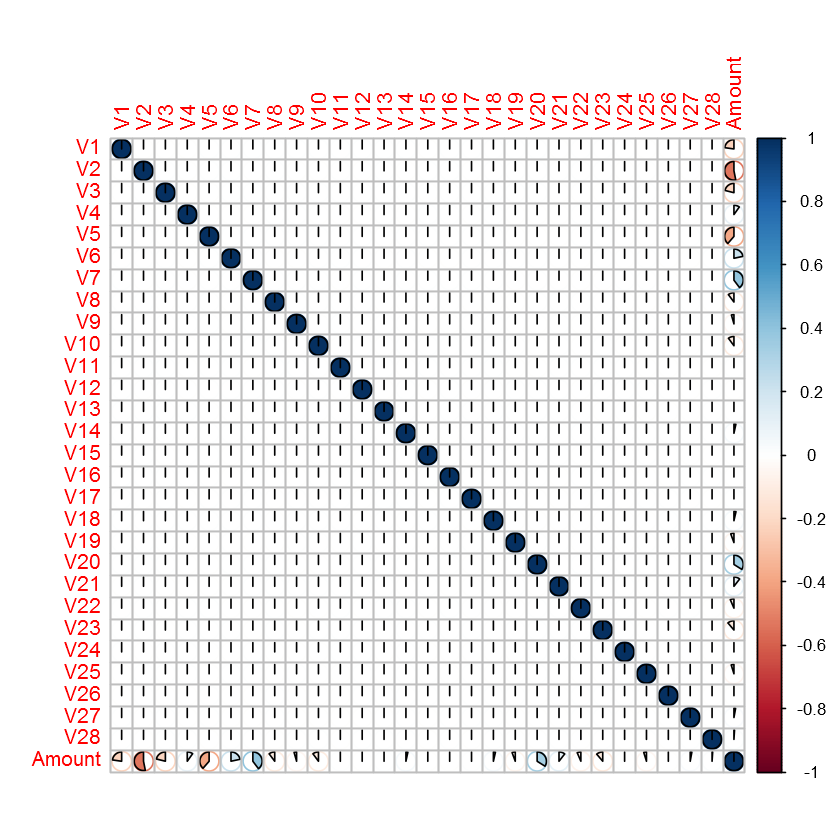

In [9]:
library(corrplot)
co<-cor(dataset)
corrplot(co, method="pie")

In [14]:
distPred <- predict(da2, test)  # predict distance
result1 <- data.frame(LGD = test$Amount , PredLGD= distPred , diff = (test$Amount-distPred) )
head(result1)

,LGD,PredLGD,diff
7,4.99,50.87275,-45.882754
9,93.20,67.02606,26.173940
12,9.99,20.61623,-10.626230
22,34.09,31.29514,2.794856
25,0.89,-23.33980,24.229804
35,1.77,16.23169,-14.461693


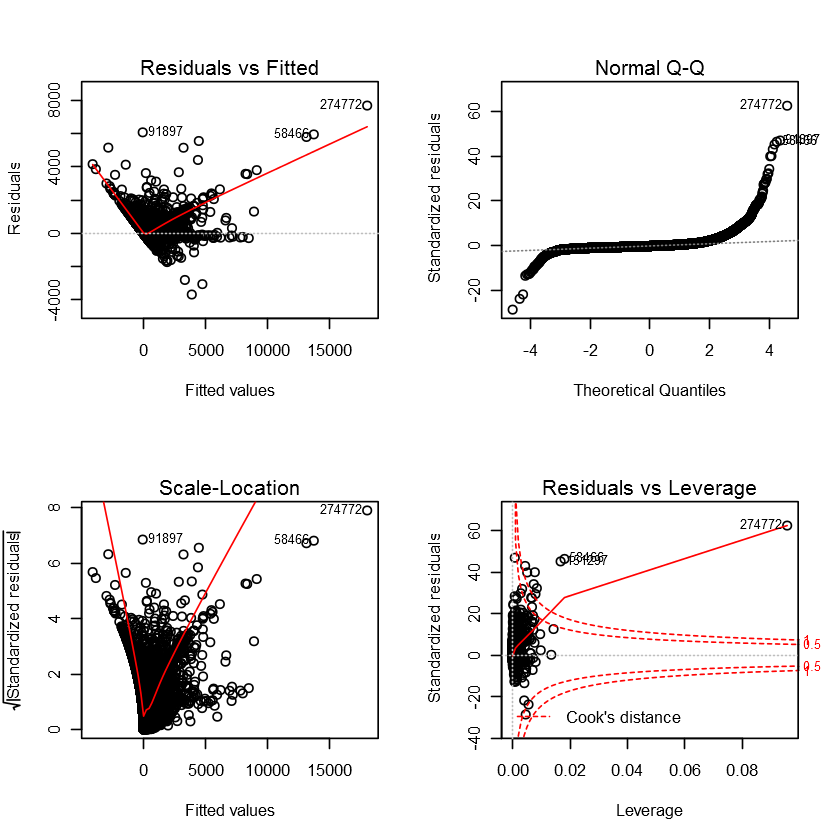

In [15]:
par(mfrow = c(2,2))
plot(da2)